In [77]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime,timedelta
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 

In [78]:
poblaciones=pd.read_csv('data/1.Poblaciones.csv', sep = ';',encoding='latin1') 

In [79]:
poblaciones['Periodo'] =  pd.to_datetime(poblaciones['Periodo'], infer_datetime_format=True)

In [80]:
poblaciones.head()

,Encuesta,Periodo,Indicadores,Total,Urbana,Rural,Hombre,Mujer
0,ENEMDU,2007-01-12,Población Total,13.682.302,9.066.209,4.616.093,6.768.646,6.913.656
1,ENEMDU,2007-01-12,Población menor de 15 años,4.372.812,2.723.124,1.649.688,2.226.618,2.146.194
2,ENEMDU,2007-01-12,Población en Edad de Trabajar (PET),9.309.490,6.343.085,2.966.404,4.542.028,4.767.462
3,ENEMDU,2007-01-12,Población Económicamente Activa,6.336.029,4.227.702,2.108.328,3.777.232,2.558.798
4,ENEMDU,2007-01-12,Empleo,6.019.332,3.971.040,2.048.292,3.632.314,2.387.018


In [119]:
periodo_indicadores = poblaciones.groupby([poblaciones['Periodo'].map(lambda x: x.year),poblaciones['Indicadores']]).last()

periodo_indicadores_reset = periodo_indicadores.droplevel(0).reset_index()
periodo_indicadores_reset.head(10)

,Indicadores,Encuesta,Periodo,Total,Urbana,Rural,Hombre,Mujer
0,Desempleo,ENEMDU,2007-01-12,316.697,256.662,60.036,144.918,171.780
1,Desempleo Abierto,ENEMDU,2007-01-12,193.225,168.728,24.497,97.565,95.660
2,Desempleo Cesante,ENEMDU,2007-01-12,190.044,160.289,29.755,99.490,90.554
3,Desempleo Nuevo,ENEMDU,2007-01-12,126.653,96.372,30.281,45.427,81.226
4,Desempleo Oculto,ENEMDU,2007-01-12,123.472,87.934,35.539,47.353,76.119
5,Empleo,ENEMDU,2007-01-12,6.019.332,3.971.040,2.048.292,3.632.314,2.387.018
6,Empleo Adecuado/Pleno,ENEMDU,2007-01-12,2.737.158,2.236.440,500.719,1.907.451,829.707
7,Empleo no clasificado,ENEMDU,2007-01-12,65.155,45.430,19.725,39.282,25.873
8,Empleo no remunerado,ENEMDU,2007-01-12,557.146,215.994,341.152,176.122,381.025
9,Otro Empleo no pleno,ENEMDU,2007-01-12,1.504.000,785.461,718.539,830.341,673.659


In [120]:
periodo_indicadores_reset['Periodo']=periodo_indicadores_reset['Periodo'].dt.year

In [130]:
periodo_indicadores_empleo = periodo_indicadores_reset.loc[(periodo_indicadores_reset['Indicadores'] == 'Empleo')]
periodo_indicadores_desempleo = periodo_indicadores_reset.loc[(periodo_indicadores_reset['Indicadores'] == 'Desempleo')]

periodo_indicadores_empleo


,Indicadores,Encuesta,Periodo,Total,Urbana,Rural,Hombre,Mujer
5,Empleo,ENEMDU,2007,6.019.332,3.971.040,2.048.292,3.632.314,2.387.018
23,Empleo,ENEMDU,2008,6.005.395,4.012.298,1.993.097,3.635.236,2.370.159
41,Empleo,ENEMDU,2009,6.125.135,4.050.179,2.074.956,3.699.840,2.425.296
59,Empleo,ENEMDU,2010,6.113.230,4.054.350,2.058.880,3.738.807,2.374.423
77,Empleo,ENEMDU,2011,6.304.834,4.212.188,2.092.646,3.844.507,2.460.327
95,Empleo,ENEMDU,2012,6.424.840,4.279.017,2.145.823,3.890.159,2.534.681
113,Empleo,ENEMDU,2013,6.664.241,4.481.130,2.183.111,4.075.323,2.588.918
131,Empleo,ENEMDU,2014,6.921.107,4.647.582,2.273.525,4.167.574,2.753.533
149,Empleo,ENEMDU,2015,7.140.636,4.840.314,2.300.322,4.274.061,2.866.574
167,Empleo,ENEMDU,2016,7.463.579,4.971.669,2.491.910,4.374.323,3.089.256


In [131]:
periodo_indicadores_desempleo

,Indicadores,Encuesta,Periodo,Total,Urbana,Rural,Hombre,Mujer
0,Desempleo,ENEMDU,2007,316.697,256.662,60.036,144.918,171.780
18,Desempleo,ENEMDU,2008,380.026,317.011,63.015,165.296,214.730
36,Desempleo,ENEMDU,2009,423.802,347.068,76.734,201.625,222.177
54,Desempleo,ENEMDU,2010,323.027,264.587,58.440,159.583,163.443
72,Desempleo,ENEMDU,2011,276.787,224.678,52.109,131.747,145.040
90,Desempleo,ENEMDU,2012,276.174,225.339,50.835,148.093,128.081
108,Desempleo,ENEMDU,2013,288.745,229.018,59.727,141.721,147.024
126,Desempleo,ENEMDU,2014,273.414,221.119,52.295,132.542,140.872
144,Desempleo,ENEMDU,2015,357.892,289.681,68.212,172.808,185.085
162,Desempleo,ENEMDU,2016,410.441,346.612,63.829,206.777,203.664


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


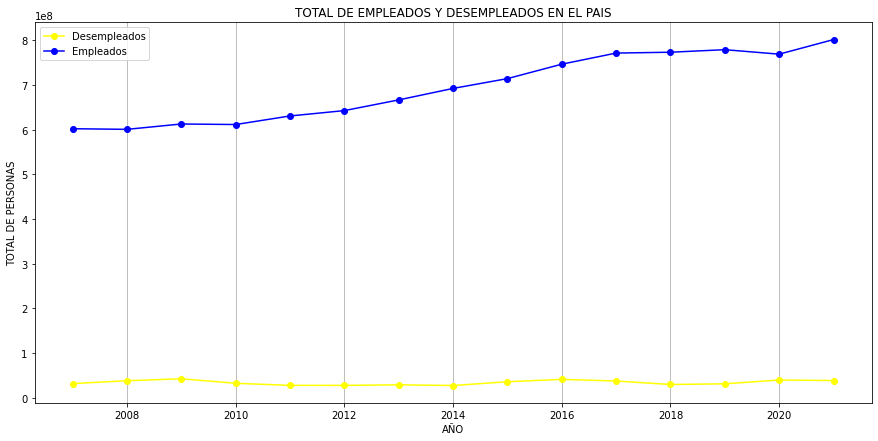

In [275]:
periodo_indicadores_desempleo['Total'] = periodo_indicadores_desempleo['Total'].astype(str).str.replace('.','').astype(float)
periodo_indicadores_empleo['Total'] = periodo_indicadores_empleo['Total'].astype(str).str.replace('.','').astype(float)

fig = plt.figure(figsize=(15,7))

plt.title('TOTAL DE EMPLEADOS Y DESEMPLEADOS EN EL PAIS')
plt.plot(periodo_indicadores_desempleo['Periodo'], periodo_indicadores_desempleo['Total'], marker='o', label='Desempleados', color='Yellow')
plt.plot(periodo_indicadores_empleo['Periodo'], periodo_indicadores_empleo['Total'], marker='o',label='Empleados', color='Blue')
plt.xlabel('AÑO')
plt.ylabel('TOTAL DE PERSONAS')
plt.legend()
plt.grid(axis = 'x')

plt.show()

In [233]:
sectorizacion=pd.read_csv('data/4. Sectorización del empleo.csv', sep = ';',encoding='latin1').dropna()

In [234]:
sectorizacion.head()

,Periodo,jun-07,sep-07,dic-07,mar-08,jun-08,sep-08,dic-08,mar-09,jun-09,sep-09,dic-09,mar-10,jun-10,sep-10,dic-10,mar-11,jun-11,sep-11,dic-11,mar-12,jun-12,sep-12,dic-12,mar-13,jun-13,sep-13,dic-13,mar-14,jun-14,sep-14,dic-14,mar-15,jun-15,sep-15,dic-15,mar-16,jun-16,sep-16,dic-16,mar-17,jun-17,sep-17,dic-17,mar-18,jun-18,sep-18,dic-18,mar-19,jun-19,sep-19,dic-19,sep-20,oct-20,nov-20,dic-20,ene-21,feb-21,mar-21,abr-21,may-21,jun-21,jul-21,ago-21,sep-21,oct-21
0,Sector Formal,-,-,"41,00%",-,"42,50%",-,"43,90%",-,-,-,"43,70%",-,"44,90%",-,"47,20%",-,"46,30%",-,"46,50%",-,"47,40%",-,"48,70%",-,"47,60%",-,"49,30%","48,70%","50,90%","51,20%","50,90%","49,90%","51,20%","50,60%","50,50%","48,70%","49,00%","47,70%","47,60%","47,00%","47,90%","47,40%","48,90%","48,30%","46,00%","46,80%","46,20%","45,70%","45,90%","46,50%","44,70%","41,60%","42,60%","41,00%","40,90%","41,90%","41,40%","42,10%","39,90%","39,70%","42,30%","40,60%","41,20%","43,90%","41,40%"
1,Sector Informal,-,-,"45,10%",-,"45,40%",-,"43,50%",-,-,-,"43,80%",-,"42,30%",-,"42,80%",-,"42,20%",-,"42,70%",-,"41,40%",-,"40,80%",-,"43,20%",-,"40,10%","41,80%","38,90%","41,40%","39,70%","42,10%","39,30%","40,60%","40,40%","43,00%","43,00%","44,50%","43,70%","45,60%","45,00%","46,40%","44,10%","45,00%","47,50%","46,20%","46,20%","46,70%","46,30%","46,70%","46,70%","52,50%","52,10%","52,80%","51,60%","51,00%","49,90%","50,90%","52,70%","52,70%","49,90%","51,20%","50,60%","49,20%","52,20%"
2,Empleo Doméstico,-,-,"3,30%",-,"3,30%",-,"3,50%",-,-,-,"3,40%",-,"3,40%",-,"2,90%",-,"3,00%",-,"2,30%",-,"2,70%",-,"2,50%",-,"2,60%",-,"3,10%","3,20%","2,70%","2,60%","3,20%","2,70%","2,70%","2,50%","2,70%","2,50%","2,70%","2,60%","2,80%","2,80%","2,80%","2,70%","2,50%","2,60%","2,60%","2,70%","2,90%","2,80%","2,60%","2,60%","3,00%","1,90%","1,50%","2,00%","2,60%","1,80%","1,90%","1,90%","1,90%","2,00%","2,00%","2,10%","2,40%","2,40%","2,20%"
3,No Clasificados por Sector,-,-,"10,60%",-,"8,80%",-,"9,20%",-,-,-,"9,10%",-,"9,30%",-,"7,10%",-,"8,40%",-,"8,40%",-,"8,50%",-,"8,00%",-,"6,60%",-,"7,50%","6,30%","7,40%","4,90%","6,20%","5,30%","6,80%","6,30%","6,50%","5,80%","5,30%","5,30%","6,00%","4,50%","4,30%","3,40%","4,50%","4,10%","3,90%","4,30%","4,80%","4,80%","5,20%","4,30%","5,60%","4,00%","3,80%","4,20%","4,90%","5,40%","6,80%","5,10%","5,50%","5,60%","5,80%","6,20%","5,80%","4,50%","4,20%"


In [235]:
sectorizacion_ultima=sectorizacion.transpose()
sectorizacion_ultima

,0,1,2,3
Periodo,Sector Formal,Sector Informal,Empleo Doméstico,No Clasificados por Sector
jun-07,-,-,-,-
sep-07,-,-,-,-
dic-07,"41,00%","45,10%","3,30%","10,60%"
mar-08,-,-,-,-
...,...,...,...,...
jun-21,"42,30%","49,90%","2,00%","5,80%"
jul-21,"40,60%","51,20%","2,10%","6,20%"
ago-21,"41,20%","50,60%","2,40%","5,80%"
sep-21,"43,90%","49,20%","2,40%","4,50%"


In [236]:
sectores = sectorizacion_ultima.loc['Periodo']
sectores

0                 Sector Formal
1               Sector Informal
2              Empleo Doméstico
3    No Clasificados por Sector
Name: Periodo, dtype: object

In [245]:
porcentaje_sectores=sectorizacion_ultima.loc['oct-21']
porcentaje_sectores

0    41,40%
1    52,20%
2     2,20%
3     4,20%
Name: oct-21, dtype: object

([<matplotlib.patches.Wedge at 0x7f471a084850>,
 [Text(0.2935921731659033, 1.0600960502971994, 'Sector Formal'),
  Text(-0.49938947630209474, -0.9801072140121813, 'Sector Informal'),
  Text(1.039569426194266, -0.3595767068681234, 'Empleo Doméstico'),
  Text(1.090438411371068, -0.1447206654439566, 'No Clasificados por Sector')])

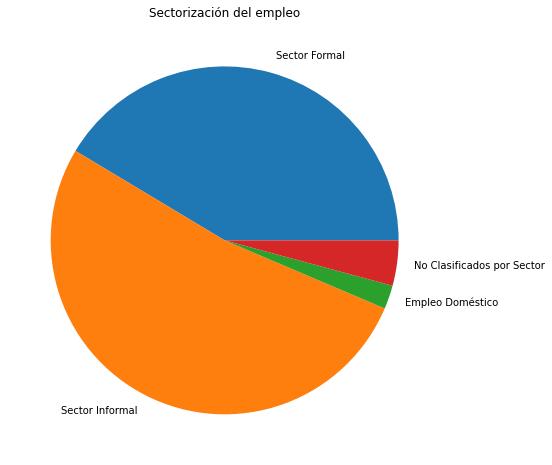

In [241]:
fig = plt.figure(figsize=(15,8))
plt.title("Sectorización del empleo")
plt.pie([41.4,52.2,2.2,4.2], labels = sectores)

In [246]:
subempleo = periodo_indicadores_reset.loc[(periodo_indicadores_reset['Indicadores'] == 'Subempleo')]
empleo_pleno = periodo_indicadores_reset.loc[(periodo_indicadores_reset['Indicadores'] == 'Empleo Adecuado/Pleno')]
empleo_no_pleno = periodo_indicadores_reset.loc[(periodo_indicadores_reset['Indicadores'] == 'Otro Empleo no pleno')]
subempleo

,Indicadores,Encuesta,Periodo,Total,Urbana,Rural,Hombre,Mujer
15,Subempleo,ENEMDU,2007,1.155.872,687.714,468.158,679.118,476.753
33,Subempleo,ENEMDU,2008,957.978,588.824,369.155,549.097,408.881
51,Subempleo,ENEMDU,2009,1.071.615,664.855,406.760,636.204,435.411
69,Subempleo,ENEMDU,2010,889.255,559.150,330.106,550.026,339.229
87,Subempleo,ENEMDU,2011,706.458,421.914,284.544,428.949,277.509
105,Subempleo,ENEMDU,2012,603.890,345.283,258.607,349.831,254.059
123,Subempleo,ENEMDU,2013,809.269,477.717,331.552,490.630,318.640
141,Subempleo,ENEMDU,2014,925.774,569.983,355.791,550.060,375.714
159,Subempleo,ENEMDU,2015,1.050.646,653.874,396.772,621.028,429.618
177,Subempleo,ENEMDU,2016,1.564.825,1.001.485,563.340,935.989,628.836


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'TOTAL SUBEMPLEOS')

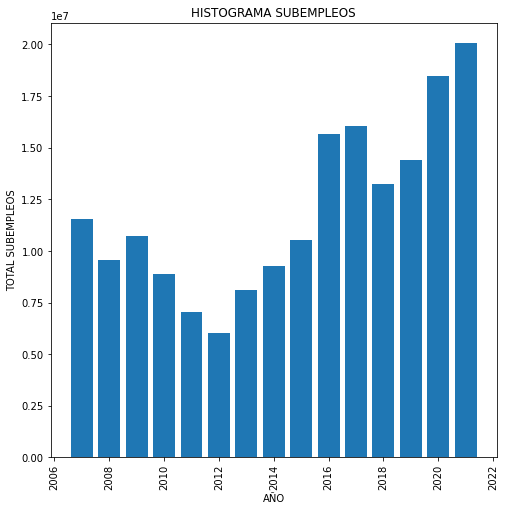

In [272]:
subempleo['Total'] = subempleo['Total'].astype(str).str.replace('.','').astype(float)

fig = plt.figure(figsize=(8,8))
plt.title('HISTOGRAMA SUBEMPLEOS')
plt.bar(subempleo['Periodo'], subempleo['Total'])
plt.xlabel('AÑO')
plt.xticks(rotation=90)
plt.ylabel('TOTAL SUBEMPLEOS')

In [247]:
empleo_pleno

,Indicadores,Encuesta,Periodo,Total,Urbana,Rural,Hombre,Mujer
6,Empleo Adecuado/Pleno,ENEMDU,2007,2.737.158,2.236.440,500.719,1.907.451,829.707
24,Empleo Adecuado/Pleno,ENEMDU,2008,2.858.659,2.339.288,519.370,1.991.157,867.502
42,Empleo Adecuado/Pleno,ENEMDU,2009,2.565.691,2.100.511,465.180,1.765.402,800.289
60,Empleo Adecuado/Pleno,ENEMDU,2010,2.875.533,2.326.713,548.819,1.950.471,925.062
78,Empleo Adecuado/Pleno,ENEMDU,2011,2.996.566,2.460.350,536.215,2.061.313,935.253
96,Empleo Adecuado/Pleno,ENEMDU,2012,3.118.174,2.546.940,571.234,2.082.635,1.035.538
114,Empleo Adecuado/Pleno,ENEMDU,2013,3.328.048,2.680.988,647.060,2.257.012,1.071.036
132,Empleo Adecuado/Pleno,ENEMDU,2014,3.545.802,2.745.575,800.227,2.416.359,1.129.443
150,Empleo Adecuado/Pleno,ENEMDU,2015,3.487.110,2.772.286,714.823,2.361.216,1.125.894
168,Empleo Adecuado/Pleno,ENEMDU,2016,3.243.293,2.533.751,709.542,2.194.304,1.048.990


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'TOTAL EMPLEO PLENO')

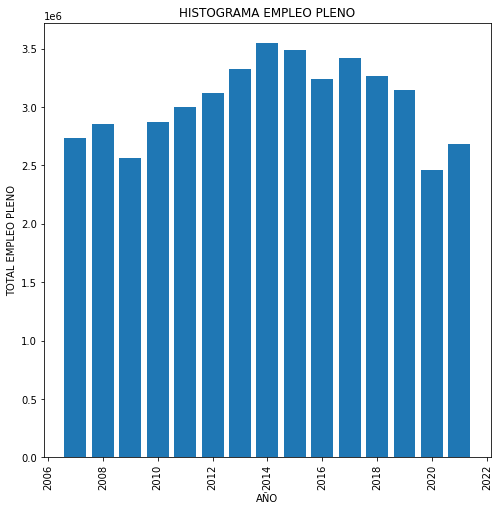

In [276]:
empleo_pleno['Total'] = empleo_pleno['Total'].astype(str).str.replace('.','').astype(float)

fig = plt.figure(figsize=(8,8))
plt.title('HISTOGRAMA EMPLEO PLENO')
plt.bar(empleo_pleno['Periodo'], empleo_pleno['Total'])
plt.xlabel('AÑO')
plt.xticks(rotation=90)
plt.ylabel('TOTAL EMPLEO PLENO')

In [248]:
empleo_no_pleno

,Indicadores,Encuesta,Periodo,Total,Urbana,Rural,Hombre,Mujer
9,Otro Empleo no pleno,ENEMDU,2007,1.504.000,785.461,718.539,830.341,673.659
27,Otro Empleo no pleno,ENEMDU,2008,1.649.349,859.126,790.223,923.415,725.935
45,Otro Empleo no pleno,ENEMDU,2009,1.778.578,951.354,827.224,1.023.151,755.428
63,Otro Empleo no pleno,ENEMDU,2010,1.765.688,939.902,825.786,1.037.384,728.304
81,Otro Empleo no pleno,ENEMDU,2011,2.056.875,1.089.496,967.379,1.178.723,878.152
99,Otro Empleo no pleno,ENEMDU,2012,2.018.582,1.035.693,982.889,1.196.931,821.651
117,Otro Empleo no pleno,ENEMDU,2013,2.019.279,1.120.868,898.411,1.173.023,846.256
135,Otro Empleo no pleno,ENEMDU,2014,1.924.634,1.116.206,808.428,1.042.800,881.834
153,Otro Empleo no pleno,ENEMDU,2015,1.981.205,1.152.517,828.688,1.082.506,898.699
171,Otro Empleo no pleno,ENEMDU,2016,1.978.071,1.163.990,814.081,1.042.372,935.699


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'TOTAL EMPLEO NO PLENO')

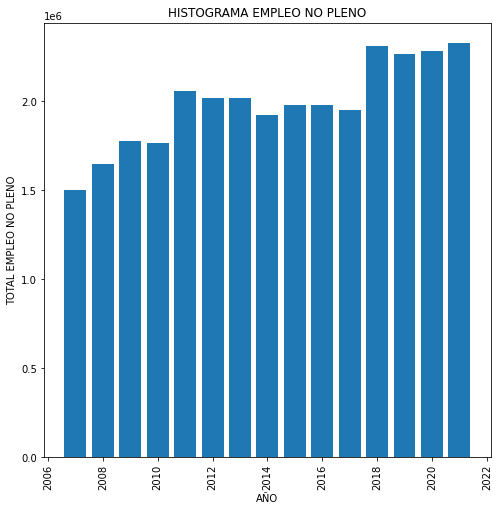

In [277]:
empleo_no_pleno['Total'] = empleo_no_pleno['Total'].astype(str).str.replace('.','').astype(float)

fig = plt.figure(figsize=(8,8))
plt.title('HISTOGRAMA EMPLEO NO PLENO')
plt.bar(empleo_no_pleno['Periodo'], empleo_no_pleno['Total'])
plt.xlabel('AÑO')
plt.xticks(rotation=90)
plt.ylabel('TOTAL EMPLEO NO PLENO')